In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

In [5]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 6).all()
print (type(results))

<class 'list'>


In [6]:
#  3. Convert the June temperatures to a list.
june_temps = [temp[1] for temp in results]
#print(type(june_temps))
june_temps[:10]

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0]

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date' ,'temperature'])
df.head()

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [9]:
# june temperatures sorted by year
jun_temp_df = df.groupby(df['date'].str.slice(0,4)).mean()
jun_temp_df

,temperature
date,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907
2015,74.990148
2016,75.175258
2017,77.219895


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
result1 = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 12).all()

In [11]:
# 7. Convert the December temperatures to a list.
# Temperatures to list
dec_temps = [temp[1] for temp in result1]

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
# Adding precipitation to df for analysis. 
df1 = pd.DataFrame(result1, columns=['date', 'temperature'])
df1.head()

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df1.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [14]:
# june temperatures sorted by year
dec_temp_df = df1.groupby(df1['date'].str.slice(0,4)).mean()
dec_temp_df

,temperature
date,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861
2015,73.423913
2016,71.130000


## Additional: Ploting comparision Temp data with year 

In [15]:
# ploting data by combining the two dataframes (jun & dec) as one df and renaming data
df2 = pd.DataFrame({
    'June Temperature': jun_temp_df['temperature'],
    'December Temperature': dec_temp_df['temperature']
})
df2

,June Temperature,December Temperature
2010,74.925620,70.208511
2011,73.938326,70.820628
2012,74.000000,71.188073
2013,74.599078,71.094017
2014,75.027907,69.896861
2015,74.990148,73.423913
2016,75.175258,71.130000
2017,77.219895,NaN


<AxesSubplot:title={'center':'Temperature Comparision Over years'}, xlabel='Year', ylabel='Avg.Temperature'>

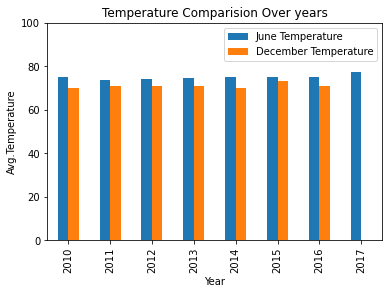

In [16]:
df2.plot(kind='bar',
            title='Temperature Comparision Over years',
            ylim = [0,100],
            xlabel='Year',
            ylabel='Avg.Temperature',
           )